## Lalama IV: It Gets Easier

Alright.

I showed you all that stuff I just showed because you probably will have to use it one day if you do any kind of coding.

But for most analyses we do, somebody already wrote code that does that analysis.

We can just use the great code that they wrote and that thousands of other people have already tested and improved.

Now we're standing on the shoulder of giants! Or something like that.

## I. numpy: kind of like `MATLAB` in Python

**numpy** is a library that provides matrix-like structures that many scientists use.

It extends **slice notation** so that we can refer to rows and columns of a matrix.

It also implements many functions that `MATLAB` users will be familiar with.

```Python
import numpy as np
zero_arr = np.zeros((10,10)) # creates a 10 by 10 array / matrix of zeros
print(zero_arr[5,5])
>>> 0
```

We can rewrite our mean and standard deviation dictionary functions using numpy functions.

** These functions are much faster, especially when dealing with large datasets, because numpy is a Python wrapper around very efficient scientific computing libraries written in speedy languages like Fortran and C **

In [236]:
import numpy as np

def compute_mouse_mean_and_std_dev(sorted_by_strain):
    """
    takes sorted_by_strain returned by sort_by_strain
    and computes mean and standard deviation for each strain.
    returns mean_mouse_dict.
    """
    mouse_means = {}
    mouse_std_devs = {}
    
    for key,val in sorted_by_strain.items():
        mouse_means[key] = np.mean(val)
        mouse_std_devs[key] = np.std(val)
    return mouse_means,mouse_std_devs

## II. making a package in Python

So I didn't tell you ... but I made a package out of the functions we wrote already.

It's called "pyjax".

Basically it's two modules (AKA) files ...

plus a completely empty text file called `__init__.py` ...
 
inside a folder called `pyjax`.

That's the basics of how you make a package in Python.

Make a folder, and then put an empty `__init__.py` file inside of it with your modules.

As long as that folder is on your `$PATH`, then the Python interpreter will find it and recognize it as a package.

So you can do the same with your own code.

## III. Using a package that you've created in Jupyter

Again, if the package is on your path, or if it's in the folder you're working from, the Python kernel in a Jupyter notebook should be able to find it.

Here's everything we've done so far, now with numpy goodness we just added, in three lines.

In [237]:
import pyjax.csv
import pyjax.utils

STRAIN_IND = 0
VALUE_IND = 12
CSV_FILE = 'Willott1_table-1.csv'

parsed_file = pyjax.csv.parse(CSV_FILE)
sorted_by_strain = pyjax.utils.sort_by_strain(parsed_file,STRAIN_IND,VALUE_IND)
strain_means, strain_std_devs = pyjax.utils.compute_strain_mean_and_std(sorted_by_strain)

## IV. matplotlib: like `MATLAB` graphs in Python

matploblib is a library for plotting.

There is a `pyplot` module in matplotlib that uses almost verbatim the syntax from `MATLAB`.

Let's use it now to plot our data.

First we need to put our values in lists (like you would put them into a vector to plot something in `MATLAB`).

In [238]:
# need to get means and std. deviations into lists
strain_names_sorted = sorted(strain_means.keys())
means_sorted_by_strain = [strain_means[key] for key in strain_names_sorted]
std_devs_sorted_by_strain = [strain_std_devs[key] for key in strain_names_sorted]

Now we sort the mean ASR values (like you would do with `MATLAB` sort).

Numpy has a `sort` function that sorts an array in place.

Unlike `MATLAB` it uses a separate `argsort` function to returns the indices you would use to sort the array (`MATLAB` returns the indices automatically from its `sort`, but we don't always need them.)

We want the indices for sorting here so we can use them with the array of standard deviations and with the list of strain names.

In [239]:
import numpy as np
sort_by_ASR_inds = np.argsort(means_sorted_by_strain)
sort_by_ASR_inds = np.concatenate((sort_by_ASR_inds[:5],sort_by_ASR_inds[-5:]))

Now we can sort everything by increasing value of mean ASR using those indices.

This will make our plot readable.

And also useful.

In [240]:
means_sorted_by_asr = np.asarray(means_sorted_by_strain)[sort_by_ASR_inds]
std_devs_sorted_by_asr = np.asarray(std_devs_sorted_by_strain)[sort_by_ASR_inds]
strain_names_sorted_by_asr = [strain_names_sorted[ind] for ind in sort_by_ASR_inds]

We import matplotlib.

Notice the line magic command that lets us show plots 'in-line' (in the notebook) instead of having them open in another window.

In [241]:
%matplotlib inline
import matplotlib.pyplot as plt

then we plot:

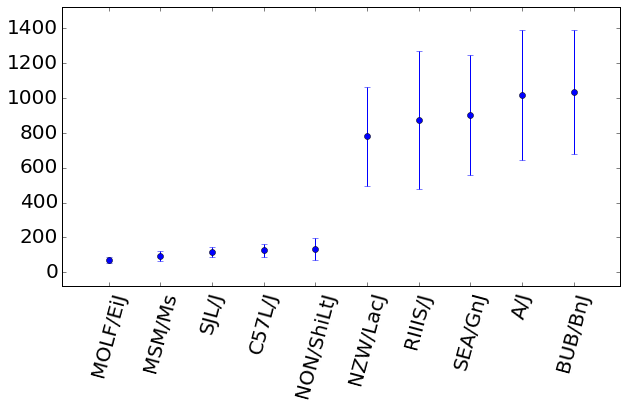

In [242]:
dummy_x_values = range(len(means_sorted_by_asr))
plt.figure(figsize=(10,5))
plt.errorbar(dummy_x_values,means_sorted_by_asr,std_devs_sorted_by_asr,fmt='bo')
plt.xticks(dummy_x_values,strain_names_sorted_by_asr,rotation=75)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.margins(0.1)
plt.show()

## V. pandas: it gets even easier

Let's use the **pandas** library to do the heavy lifting of importing csv files.

**pandas** allows us to work with objects called **dataframes** that you may be familiar with if you have ever used the statistical programming language R.

`pandas` is built on top of `numpy` and `matplotlib` to make it even more convenient to work with your data.

In [244]:
import pandas as pd
df_willott = pd.read_csv('Willott1_table-1.csv',skiprows=6,header=0) # df is short for 'dataframe'

pandas has many convenience methods, e.g. the `head` method of the `dataframe` object lets us take a quick look at the first few rows of values.

In [245]:
df_willott.head() # head method shows the first few rows

,strain,sex,id,round,bw,PPI_4,PPI_12,PPI_20,PPI_tot,ASR_70,ASR_80,ASR_90,ASR_100,ASR_latency,ASR_habituation
0,129S1/SvImJ,f,F103,all,NaN,0.3745,0.27400,0.24500,0.8925,134.50,254.00,340.5,706.5,31.45,0.446
1,129S1/SvImJ,f,F104,all,NaN,0.9875,0.96600,0.81400,2.7650,158.50,232.00,251.5,223.5,27.70,0.662
2,129S1/SvImJ,f,F105,all,NaN,0.2990,0.14685,0.10895,0.5545,70.85,91.15,379.0,721.5,35.20,1.101
3,129S1/SvImJ,f,F106,all,NaN,0.5720,0.43000,0.37200,1.3755,197.50,188.50,400.5,498.0,28.45,0.526
4,129S1/SvImJ,f,F107,all,NaN,0.9565,0.61100,0.53450,2.1050,79.85,150.00,240.0,237.5,27.70,0.571


## VI. filtering and plotting with pandas

`dataframes` have convenient `R`-like methods for merging or filtering tables, as well as `MATLAB`/Numpy-like slice notation and methods.

**Say we (as Lalama) only want the mouse strains from the ASR data for which we also have measurements of serotonin receptor levels in cerebral cortex. We need to:**
  - load a csv file that includes measurements of serotonin receptor levels
  - get the names of the mouse strains in that file
  - filter the Willot csv file to keep only info on strains that are in the serotonin receptor level file
  - then sort the ASRs in the filtered Willot file in ascending order

In [246]:
df_wiltshire = pd.read_csv('Wiltshire3_means.csv',skiprows=5,header=0)
wiltshire_strains = df_wiltshire['strain'].unique()
inds_of_strains_in_both = df_willott['strain'].isin(wiltshire_strains)
df_willott = df_willott[inds_of_strains_in_both]
grouped = df_willott.groupby(['strain'])
df_asr100 = pd.DataFrame({col:vals['ASR_100'] for col,vals in grouped})
medians = df_asr100.median().sort_values()
df_asr100 = df_asr100[medians.index]

`dataframes` objects also have plotting built into them.

Here's a box-and-whiskers plot of the ASRs at 100 decibels.

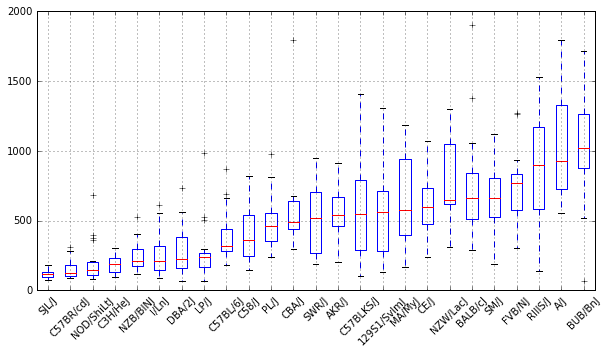

In [247]:
# use the columns in the dataframe, ordered sorted by median value
# return axes so changes can be made outside the function
plt.figure(figsize=(10,5))
df_asr100.boxplot(rot=45, figsize=(10,5),return_type='axes')

## VII. 'Factors' with pandas

Lastly Lalama will use the ranking of ASRs by strain that we just got with pandas, and then use that ranking as a 'category' (like a 'factor' in R).

Now we can sort our serotonin receptor expression levels by strain in the same order as our ASRs.

In [248]:
strains_sorted_by_ASR100 = pd.Categorical(meds.index,ordered=True)
df_wilt_sert = df_wiltshire[df_wiltshire['varname'] == 'SLC6A4_cont']
df_wilt_sert['strain'] = df_wilt_sert['strain'].astype("category", categories=medians.index, ordered=True)
df_wilt_sert_nonan = df_wilt_sert[~df_wilt_sert['strain'].isnull()]
df_wilt_sert_nonan.sort_values(by='strain',inplace=True)

C:\Users\Seymour Snyder\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Seymour Snyder\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


We plot serotonin receptor levels for strains in the same order as our ASR.

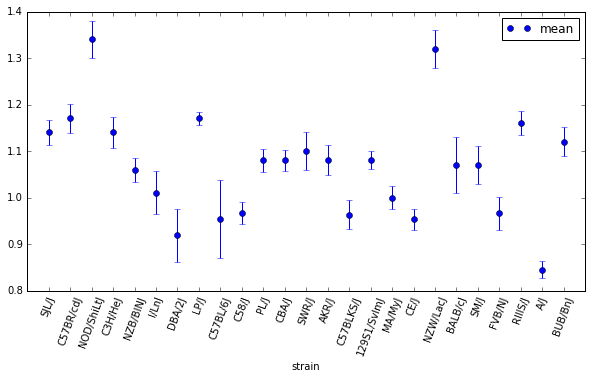

In [235]:
plt.figure()
ax = df_wilt_sert_nonan.plot(x='strain',y='mean',yerr='sd',fmt='o',figsize=(10,5),rot=70)
num_xticks = len(df_wilt_sert_nonan['strain'])
plt.xticks(range(num_xticks),
          df_wilt_sert_nonan['strain'].values)
plt.xlim([-1,num_xticks])
plt.show()

## VII. Conclusion

Hopefully I have given you some idea of:
  * how you can use numpy for numerical computing in Python (similar to `MATLAB`)
  * how you can use pandas to work with tabular and series data in Python (similar to `R`)

## more reading / listening

* A numpy and `MATLAB` comparison: https://docs.scipy.org/doc/numpy-dev/user/numpy-for-matlab-users.html
* The scipy package has many libraries built on top of numpy (e.g. one for signal processing) and includes modules that let you work with your data from MATLAB
  - https://www.scipy.org/getting-started.html
  - https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.loadmat.html
* 10 minutes to pandas: http://pandas.pydata.org/pandas-docs/stable/10min.html
* Good interview with the primary developer of Numpy: https://talkpython.fm/episodes/show/34/continuum-scientific-python-and-the-business-of-open-source
* Good interview with a core pandas developer: https://www.podcastinit.com/episode-98-pandas-with-jeff-reback/